In [1]:
import pandas as pd

# Task 1: Exploratory Data Analysis (EDA)

In [2]:
# Load the dataset
df = pd.read_csv('mushroom.csv')

# Display basic information about the dataset
df.info(), df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                2000 non-null   int64  
 1   cap_shape                 2000 non-null   object 
 2   cap_surface               2000 non-null   object 
 3   cap_color                 2000 non-null   object 
 4   bruises                   2000 non-null   object 
 5   odor                      2000 non-null   object 
 6   gill_attachment           2000 non-null   object 
 7   gill_spacing              2000 non-null   object 
 8   gill_size                 2000 non-null   object 
 9   gill_color                2000 non-null   object 
 10  stalk_shape               2000 non-null   object 
 11  stalk_root                2000 non-null   object 
 12  stalk_surface_above_ring  2000 non-null   object 
 13  stalk_surface_below_ring  2000 non-null   object 
 14  stalk_co

(None,
    Unnamed: 0 cap_shape cap_surface cap_color bruises   odor gill_attachment  \
 0        1167    sunken       scaly     white      no  anise      descending   
 1        1037    sunken     fibrous       red      no  anise         notched   
 2         309      flat     grooves    purple     yes   foul      descending   
 3         282      bell       scaly      pink     yes  fishy         notched   
 4         820      flat      smooth    yellow     yes  musty            free   
 
   gill_spacing gill_size gill_color  ...  veil_type veil_color ring_number  \
 0      distant     broad       pink  ...    partial      brown         two   
 1      crowded    narrow  chocolate  ...  universal      brown         two   
 2      crowded     broad     purple  ...  universal     yellow         two   
 3        close     broad     orange  ...    partial     yellow         two   
 4      crowded    narrow     orange  ...  universal      white        none   
 
    ring_type spore_print_col

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Set style
sns.set_style("whitegrid")

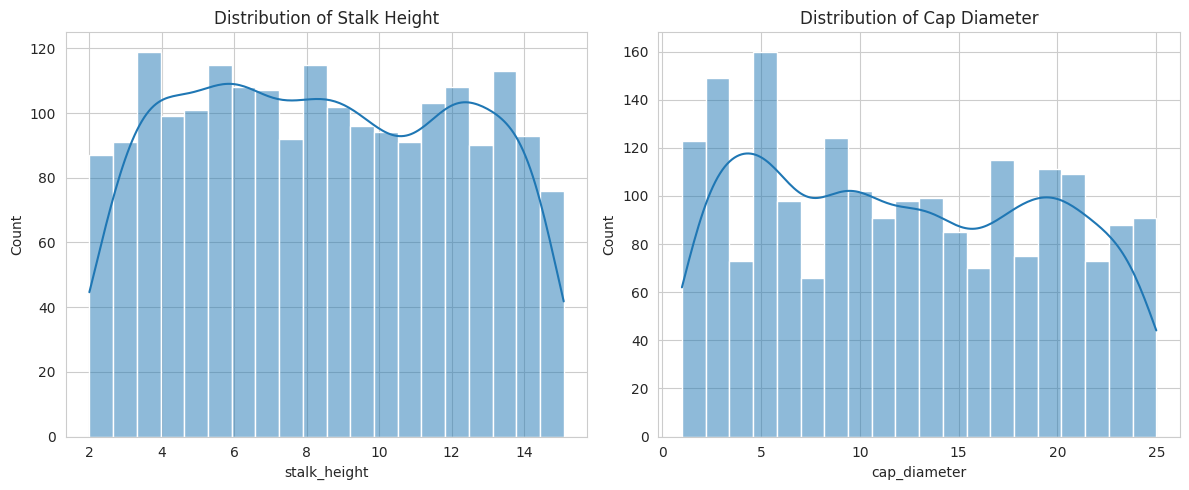

In [5]:
# Plot histograms for numerical features
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.histplot(df["stalk_height"], bins=20, kde=True, ax=axes[0])
axes[0].set_title("Distribution of Stalk Height")

sns.histplot(df["cap_diameter"], bins=20, kde=True, ax=axes[1])
axes[1].set_title("Distribution of Cap Diameter")

plt.tight_layout()
plt.show()

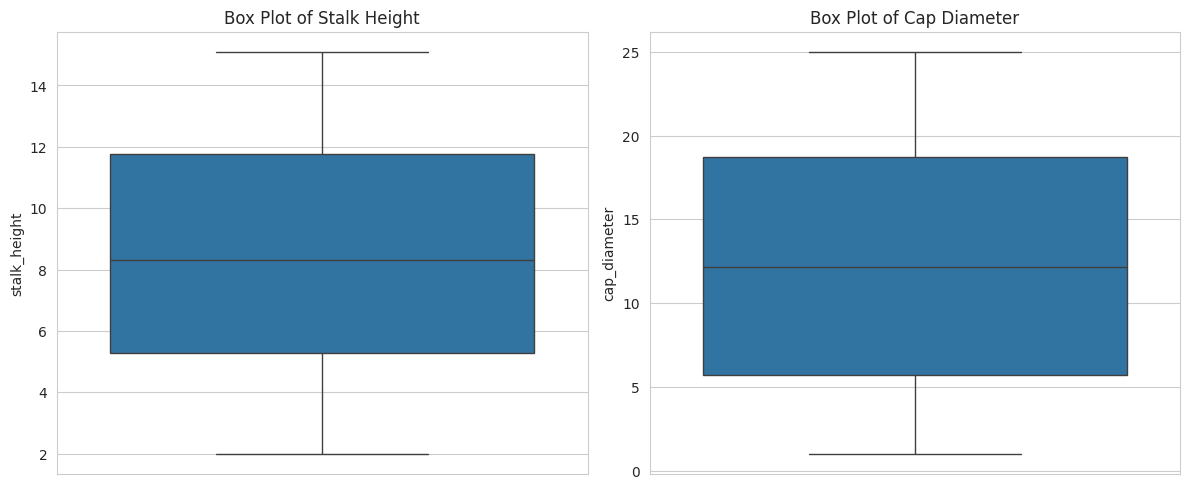

In [6]:
# Box plots for numerical features
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.boxplot(y=df["stalk_height"], ax=axes[0])
axes[0].set_title("Box Plot of Stalk Height")

sns.boxplot(y=df["cap_diameter"], ax=axes[1])
axes[1].set_title("Box Plot of Cap Diameter")

plt.tight_layout()
plt.show()

In [7]:
# Compute the correlation matrix for numerical features
corr_matrix = df[["stalk_height", "cap_diameter"]].corr()
corr_matrix

,stalk_height,cap_diameter
stalk_height,1.000000,-0.003486
cap_diameter,-0.003486,1.000000


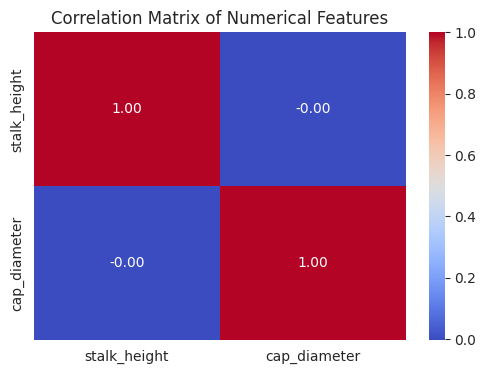

In [8]:
# Plot the heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix of Numerical Features")
plt.show()

# Task 2: Data Preprocessing

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [10]:
# Drop the unnamed index column
df = df.drop(columns=["Unnamed: 0"])
df

,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,stalk_shape,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,sunken,scaly,white,no,anise,descending,distant,broad,pink,tapering,...,partial,brown,two,sheathing,chocolate,clustered,waste,poisonous,14.276173,5.054983
1,sunken,fibrous,red,no,anise,notched,crowded,narrow,chocolate,enlarging,...,universal,brown,two,sheathing,brown,numerous,waste,edible,3.952715,19.068319
2,flat,grooves,purple,yes,foul,descending,crowded,broad,purple,tapering,...,universal,yellow,two,sheathing,purple,abundant,waste,poisonous,9.054265,7.205884
3,bell,scaly,pink,yes,fishy,notched,close,broad,orange,enlarging,...,partial,yellow,two,cobwebby,green,clustered,grasses,poisonous,5.226499,20.932692
4,flat,smooth,yellow,yes,musty,free,crowded,narrow,orange,enlarging,...,universal,white,none,none,yellow,clustered,urban,poisonous,14.037532,12.545245
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,sunken,scaly,brown,yes,foul,attached,crowded,narrow,chocolate,tapering,...,partial,orange,one,flaring,purple,abundant,leaves,poisonous,5.877891,17.464145
1996,sunken,scaly,purple,yes,musty,attached,distant,narrow,red,tapering,...,partial,white,one,zone,yellow,numerous,waste,poisonous,6.500840,13.501957
1997,convex,grooves,green,yes,fishy,notched,close,narrow,pink,tapering,...,partial,brown,two,evanescent,yellow,abundant,woods,poisonous,13.558064,11.270020
1998,bell,smooth,white,no,pungent,free,close,narrow,orange,enlarging,...,universal,yellow,one,cobwebby,brown,solitary,woods,poisonous,11.092703,8.423199


In [11]:
# Encode categorical variables
label_encoders = {}
for col in df.select_dtypes(include=["object"]).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [12]:
# Define features and target variable
X = df.drop(columns=["class"])
y = df["class"]
X,y

(      cap_shape  cap_surface  cap_color  bruises  odor  gill_attachment  \
 0             4            2          7        0     1                1   
 1             4            0          6        0     1                3   
 2             3            1          5        1     4                1   
 3             0            2          4        1     3                3   
 4             3            3          8        1     5                2   
 ...         ...          ...        ...      ...   ...              ...   
 1995          4            2          0        1     4                0   
 1996          4            2          5        1     5                0   
 1997          2            1          3        1     3                3   
 1998          0            3          7        0     7                2   
 1999          2            2          8        1     7                1   
 
       gill_spacing  gill_size  gill_color  stalk_shape  ...  \
 0                2   

In [13]:
# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test

(      cap_shape  cap_surface  cap_color  bruises  odor  gill_attachment  \
 968           4            0          4        0     7                2   
 240           3            0          6        1     6                2   
 819           1            1          0        0     3                1   
 692           4            2          2        1     4                2   
 420           4            3          7        1     5                0   
 ...         ...          ...        ...      ...   ...              ...   
 1130          4            2          8        0     1                3   
 1294          1            1          6        1     4                3   
 860           3            3          0        0     4                0   
 1459          4            1          8        0     1                1   
 1126          3            3          6        1     0                3   
 
       gill_spacing  gill_size  gill_color  stalk_shape  ...  \
 968              2   

In [14]:
# Display dataset shapes
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1600, 24), (400, 24), (1600,), (400,))

# Task 3: Data Visualization

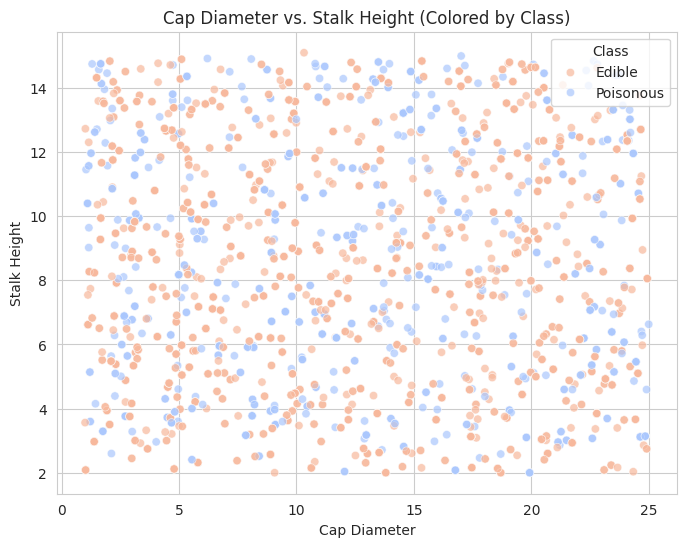

In [15]:
# Scatter plot of numerical features colored by class
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df["cap_diameter"], y=df["stalk_height"], hue=df["class"], palette="coolwarm", alpha=0.7)
plt.title("Cap Diameter vs. Stalk Height (Colored by Class)")
plt.xlabel("Cap Diameter")
plt.ylabel("Stalk Height")
plt.legend(title="Class", labels=["Edible", "Poisonous"])
plt.show()

In [16]:
import warnings
warnings.filterwarnings("ignore")

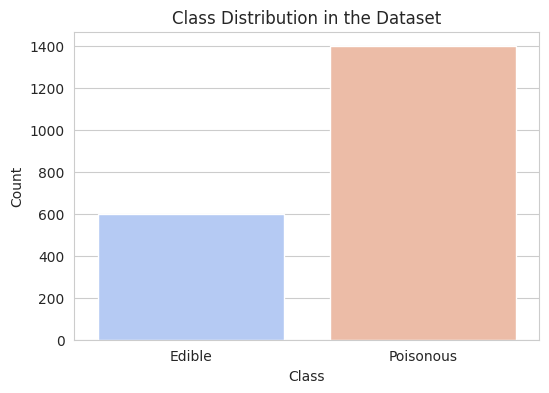

In [17]:
# Class distribution visualization
plt.figure(figsize=(6, 4))
sns.countplot(x=df["class"], palette="coolwarm")
plt.title("Class Distribution in the Dataset")
plt.xticks(ticks=[0, 1], labels=["Edible", "Poisonous"])
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

# Task 4: SVM Implementation

In [18]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [19]:
# Train an SVM classifier
svm_model = SVC(kernel="linear", random_state=42)
svm_model.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

In [20]:
# Predict on test data
y_pred = svm_model.predict(X_test)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [21]:
# Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

accuracy, report, conf_matrix

(0.6675,
 '              precision    recall  f1-score   support\n\n           0       0.00      0.00      0.00       133\n           1       0.67      1.00      0.80       267\n\n    accuracy                           0.67       400\n   macro avg       0.33      0.50      0.40       400\nweighted avg       0.45      0.67      0.53       400\n',
 array([[  0, 133],
        [  0, 267]]))

In [22]:
# Train an SVM classifier with RBF kernel for efficiency
svm_model = SVC(kernel="rbf", cache_size=500, random_state=42)
svm_model.fit(X_train, y_train)

SVC(cache_size=500, random_state=42)

In [23]:
# Predict on test data
y_pred = svm_model.predict(X_test)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [24]:
# Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

accuracy, report, conf_matrix

(0.6675,
 '              precision    recall  f1-score   support\n\n           0       0.00      0.00      0.00       133\n           1       0.67      1.00      0.80       267\n\n    accuracy                           0.67       400\n   macro avg       0.33      0.50      0.40       400\nweighted avg       0.45      0.67      0.53       400\n',
 array([[  0, 133],
        [  0, 267]]))

# Task 5: Visualization of SVM Results

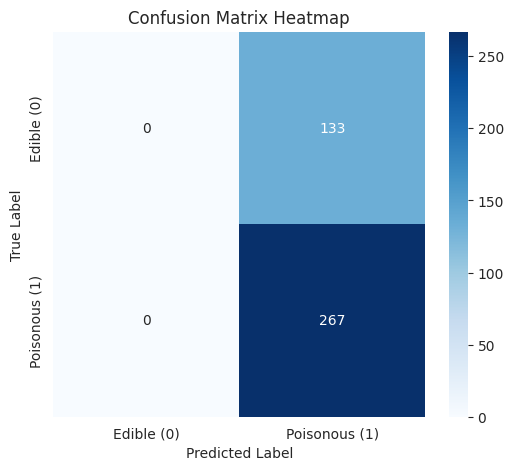

In [25]:
# Visualizing classification results using a confusion matrix heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Edible (0)', 'Poisonous (1)'], yticklabels=['Edible (0)', 'Poisonous (1)'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix Heatmap")
plt.show()

# Task 6: Parameter Tuning and Optimization

In [26]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
import pandas as pd

In [27]:
# Preprocessing (Convert categorical data to numerical)
df = df.apply(lambda x: pd.factorize(x)[0])
df

,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,stalk_shape,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,1,0,0,1,1,1,1,1,...,1,0,0,0,1,1,0,1,1,1
2,1,2,2,1,1,0,1,0,2,0,...,1,1,0,0,2,2,0,0,2,2
3,2,0,3,1,2,1,2,0,3,1,...,0,1,0,1,3,0,1,0,3,3
4,1,3,4,1,3,2,1,1,3,1,...,1,2,1,2,4,0,2,0,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0,0,5,1,1,3,1,1,1,0,...,0,3,2,3,2,2,4,0,411,413
1996,0,0,2,1,3,3,0,1,6,0,...,0,2,2,6,4,1,0,0,971,974
1997,3,2,6,1,2,1,2,1,0,0,...,0,0,0,5,4,2,3,0,458,460
1998,2,3,0,0,6,2,2,1,3,1,...,1,1,2,1,1,5,3,0,926,929


In [28]:
# Splitting dataset
from sklearn.model_selection import train_test_split
X = df.drop(columns=['class'])
y = df['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
# Define parameter grid
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid']
}

In [30]:
# Perform Grid Search with SVM
svm = SVC()
grid_search = GridSearchCV(svm, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             scoring='accuracy')

In [31]:
# Best parameters
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'C': 0.1, 'kernel': 'linear'}


In [32]:
# Best model evaluation
best_svm = grid_search.best_estimator_
accuracy = best_svm.score(X_test, y_test)
print("Best Model Accuracy:", accuracy)

Best Model Accuracy: 0.6675


# Task 7: Comparison and Analysis

In [33]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [34]:
# Define different kernels
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
results = {}

In [35]:
for kernel in kernels:
    svm_model = SVC(kernel=kernel, C=1)
    svm_model.fit(X_train, y_train)
    y_pred = svm_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[kernel] = accuracy

In [36]:
# Print accuracy for each kernel
print("SVM Kernel Comparison:")
for kernel, acc in results.items():
    print(f"{kernel} Kernel Accuracy: {acc:.4f}")

SVM Kernel Comparison:
linear Kernel Accuracy: 0.6675
poly Kernel Accuracy: 0.6675
rbf Kernel Accuracy: 0.6675
sigmoid Kernel Accuracy: 0.5950
